In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

1.13

Text(0, 0.5, 'Heat Capacity per spin $\\left<c_v\\right>$')

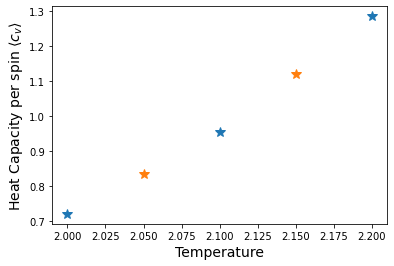

In [5]:
'''2.000000 16 -1.746046 0.720658 0.911549
2.100000 16 -1.662578 0.956355 0.868931
2.200000 16 -1.550620 1.286038 0.794644'''

T = [2.0, 2.1, 2.2]
e = [-1.746046, -1.662578, -1.550620]
Cv = [
    (e[1] - e[0])/(T[1]-T[0]),
    (e[2]-e[1])/(T[2]-T[1]),
]

fig, ax = plt.subplots()
ax.plot([T[0], T[1], T[2]], [0.720658, 0.956355, 1.286038], '*', markersize=10)
ax.plot([2.05, 2.15], Cv, '*', markersize=10)
ax.set_xlabel("Temperature", fontsize=14)
ax.set_ylabel(r"Heat Capacity per spin $\left<c_v\right>$", fontsize=14)

1.14

     L    T         e        Cv         m
0   16  2.0 -1.745455  0.724446  0.911182
1   32  2.0 -1.745699  0.726160  0.911414
2   64  2.0  2.734084  0.724144 -1.427423
3    8  2.0 -1.745454  0.717489  0.911445
4   16  2.1 -1.661473  0.961538  0.868336
..  ..  ...       ...       ...       ...
76  16  2.7 -0.968451  0.636270  0.251190
77  32  2.7 -0.963676  0.594979  0.123004
78  64  2.7  1.509284  0.594733 -0.096497
79   8  2.7 -1.030395  0.814258  0.470542
80   8  2.8 -0.955643  0.678405  0.419651

[81 rows x 5 columns]


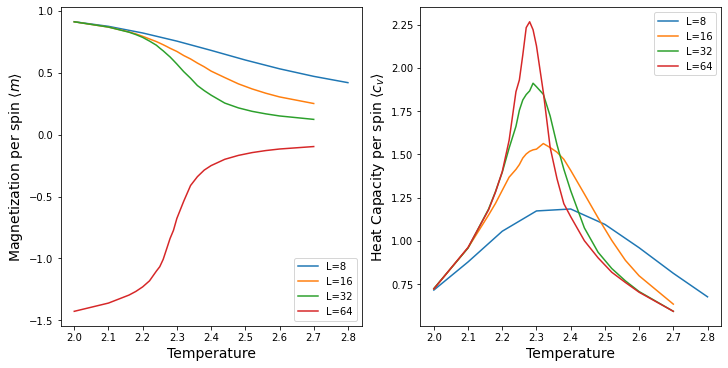

In [16]:
df = pd.read_csv("Metro/aggregated_results.txt", sep=" ")
print(df)

L_8s = df[df["L"] == 8]
L_16s = df[df["L"] == 16]
L_32s = df[df["L"] == 32]
L_64s = df[df["L"] == 64]

Ls = [L_8s, L_16s, L_32s, L_64s]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5), layout='constrained')
for data in Ls:
    Ts = data["T"]
    Cvs = data["Cv"]
    m = data["m"]
    L = data["L"].iloc[0]

    ax1.plot(Ts, m, label=f"L={L}")
    ax2.plot(Ts, Cvs, label=f"L={L}")


ax1.set_xlabel("Temperature", fontsize=14)
ax1.set_ylabel(r"Magnetization per spin $\left<m\right>$", fontsize=14)
ax1.legend()

ax2.set_xlabel("Temperature", fontsize=14)
ax2.set_ylabel(r"Heat Capacity per spin $\left<c_v\right>$", fontsize=14)
ax2.legend()

1.15

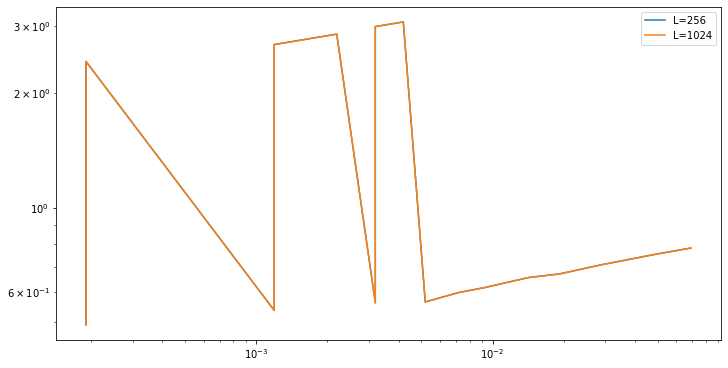

In [15]:
df = pd.read_csv("Cluster/aggregated_results.txt", sep=" ")
Tc = 2.26919

L_256 = df[df["L"] == 256]
L_1024 = df[df["L"] == 1024]

Ls = [L_256, L_1024]
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
for data in Ls:
    Ts = df["T"]
    m = df["m"]
    L = data["L"].iloc[0]

    ax.loglog(Tc - Ts, m, label=f"L={L}")

ax.legend()
    